In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('carMPG.csv',sep=',',index_col=None)

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [3]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [4]:
df.describe()


,MPG,Cylinders,Displacement,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,2015.000000,3.000000


In [5]:
from sklearn import linear_model

In [6]:
# Load the data
model = pd.DataFrame(df, columns = ['MPG', 'Acceleration'])

model[:10]

,MPG,Acceleration
0,8.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5
5,15.0,10.0
6,14.0,9.0
7,14.0,8.5
8,14.0,10.0
9,15.0,8.5


In [7]:
# #Use only one feature and Split the data into training/testing sets
df_X_train = model.Acceleration[:-20]

df_X_train[:10]

0    12.0
1    11.5
2    11.0
3    12.0
4    10.5
5    10.0
6     9.0
7     8.5
8    10.0
9     8.5
Name: Acceleration, dtype: float64

In [8]:
df_X_test = model.Acceleration[-20:]

df_X_test

378    14.7
379    17.3
380    14.5
381    14.5
382    16.9
383    15.0
384    15.7
385    16.2
386    16.4
387    17.0
388    14.5
389    14.7
390    13.9
391    13.0
392    17.3
393    15.6
394    24.6
395    11.6
396    18.6
397    19.4
Name: Acceleration, dtype: float64

In [9]:
# Split the targets into training/testing sets
df_y_train = model.MPG[:-20]

df_y_train

0       8.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
14     24.0
15     22.0
16     18.0
17     21.0
18     27.0
19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
24     21.0
25     10.0
26     10.0
27     11.0
28      9.0
29     27.0
       ... 
348    37.7
349    34.1
350    34.7
351    34.4
352    29.9
353    33.0
354    34.5
355    33.7
356    32.4
357    32.9
358    31.6
359    28.1
360    30.7
361    25.4
362    24.2
363    22.4
364    26.6
365    20.2
366    17.6
367    28.0
368    27.0
369    34.0
370    31.0
371    29.0
372    27.0
373    24.0
374    23.0
375    36.0
376    37.0
377    31.0
Name: MPG, dtype: float64

In [10]:
df_y_test = model.MPG[-20:]
df_y_test

378    38.0
379    36.0
380    36.0
381    36.0
382    34.0
383    38.0
384    32.0
385    38.0
386    25.0
387    38.0
388    26.0
389    22.0
390    32.0
391    36.0
392    27.0
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, dtype: float64

In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [12]:
print(df_X_train.shape, df_y_train.shape)

(378,) (378,)


In [13]:
df_X_train=df_X_train.reshape(len(df_X_train),1)

df_y_train=df_y_train.reshape(len(df_y_train),1)
print(df_X_train.shape, df_y_train.shape)

(378, 1) (378, 1)


In [14]:
# Train the model using the training sets
regr.fit(df_X_train,df_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 1.20270616]]


In [16]:
df_X_test = df_X_test.reshape(len(df_X_test),1)
df_y_test = df_y_test.reshape(len(df_y_test),1)

In [17]:
predict_outcome = regr.predict(df_X_test)

In [18]:
np.mean((predict_outcome - df_y_test) ** 2)

114.50760576252601

In [19]:
# The mean squared error
print("Mean squared error: %.2f"% np.mean((predict_outcome - df_y_test) ** 2))

Mean squared error: 114.51


In [20]:
regr.score(df_X_test, df_y_test)

-2.8477018065364921

In [21]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(df_X_test, df_y_test))

Variance score: -2.85


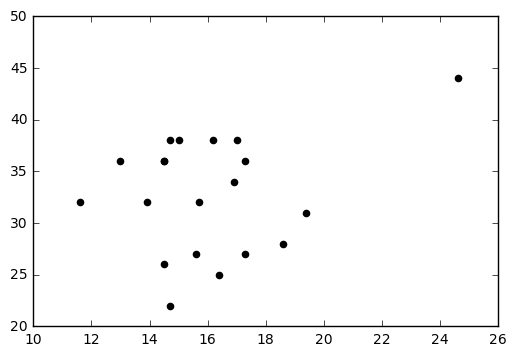

In [22]:
# Plot outputs
plt.scatter(df_X_test,df_y_test,color='black')


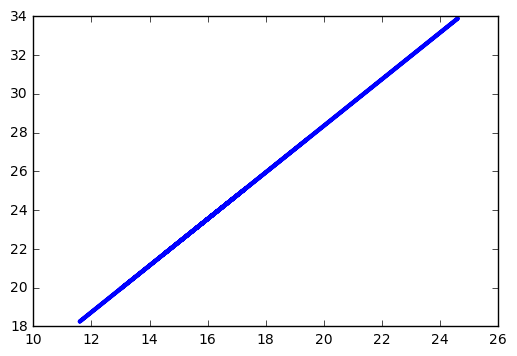

In [23]:
plt.plot(df_X_test, predict_outcome, color='blue',linewidth=3)


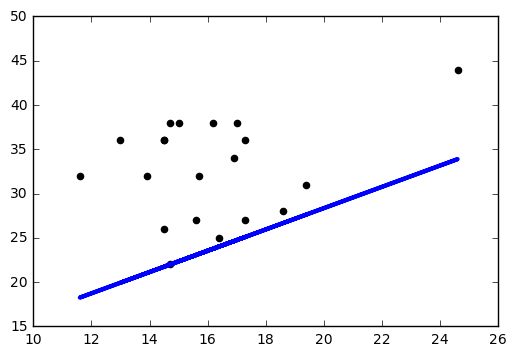

In [24]:

# Plot outputs

plt.plot(df_X_test, predict_outcome, color='blue',linewidth=3)
plt.scatter(df_X_test,df_y_test,  color='black')